# 1. ASL with CNN

In [56]:
import numpy as np
np.random.seed(5) 
import tensorflow as tf
# tf.set_random_seed(2)
tf.random.set_seed(2)
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
# AsL
# train_dir = "E:\\ygesh_isl\\ASL-Recognition-CNN-OpenCV\\asl_alphabet_train\\asl_alphabet_train"
# eval_dir = "E:\\ygesh_isl\\ASL-Recognition-CNN-OpenCV\\asl-alphabet-test"
# ISL
train_dir = "E:\\ygesh_isl\\ASL-Recognition-CNN-OpenCV\\TRAIN"
eval_dir = "E:\\ygesh_isl\\ASL-Recognition-CNN-OpenCV\\TEST"


In [57]:
tf.__version__

'2.13.0'

# 2. Loading the data


In [58]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [59]:
import keras

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

if uniq_labels == sorted(os.listdir(eval_dir)):
    X_eval, y_eval = load_images(directory = eval_dir)

## 2.1 Train-Test Split

In [60]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, stratify = labels)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of symbols:  26
Number of training images:  23400
Number of testing images:  7800
Number of evaluation images:  1301




# 3. Printing images


In [61]:
#Helper function to print images
def print_images(image_list):
    n = int(len(image_list) / len(uniq_labels))
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Training Images: 


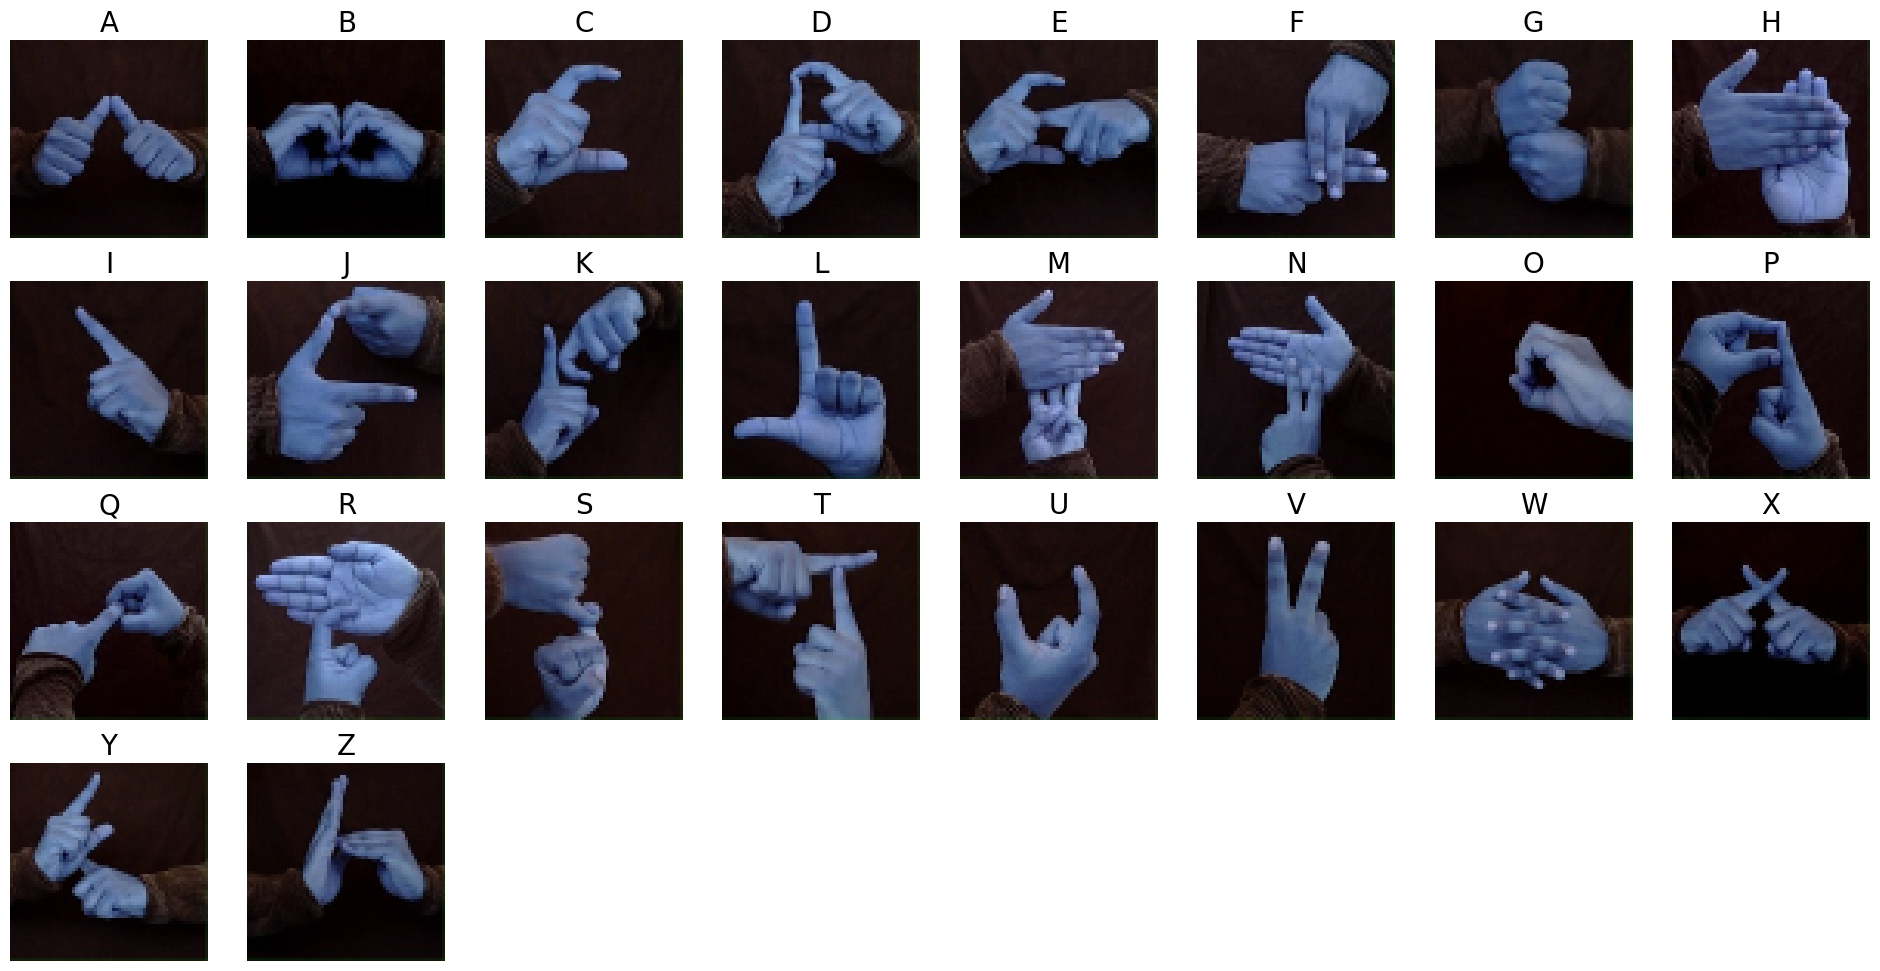

In [62]:
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]

print("Training Images: ")
print_images(image_list = X_train)

Testing images: 


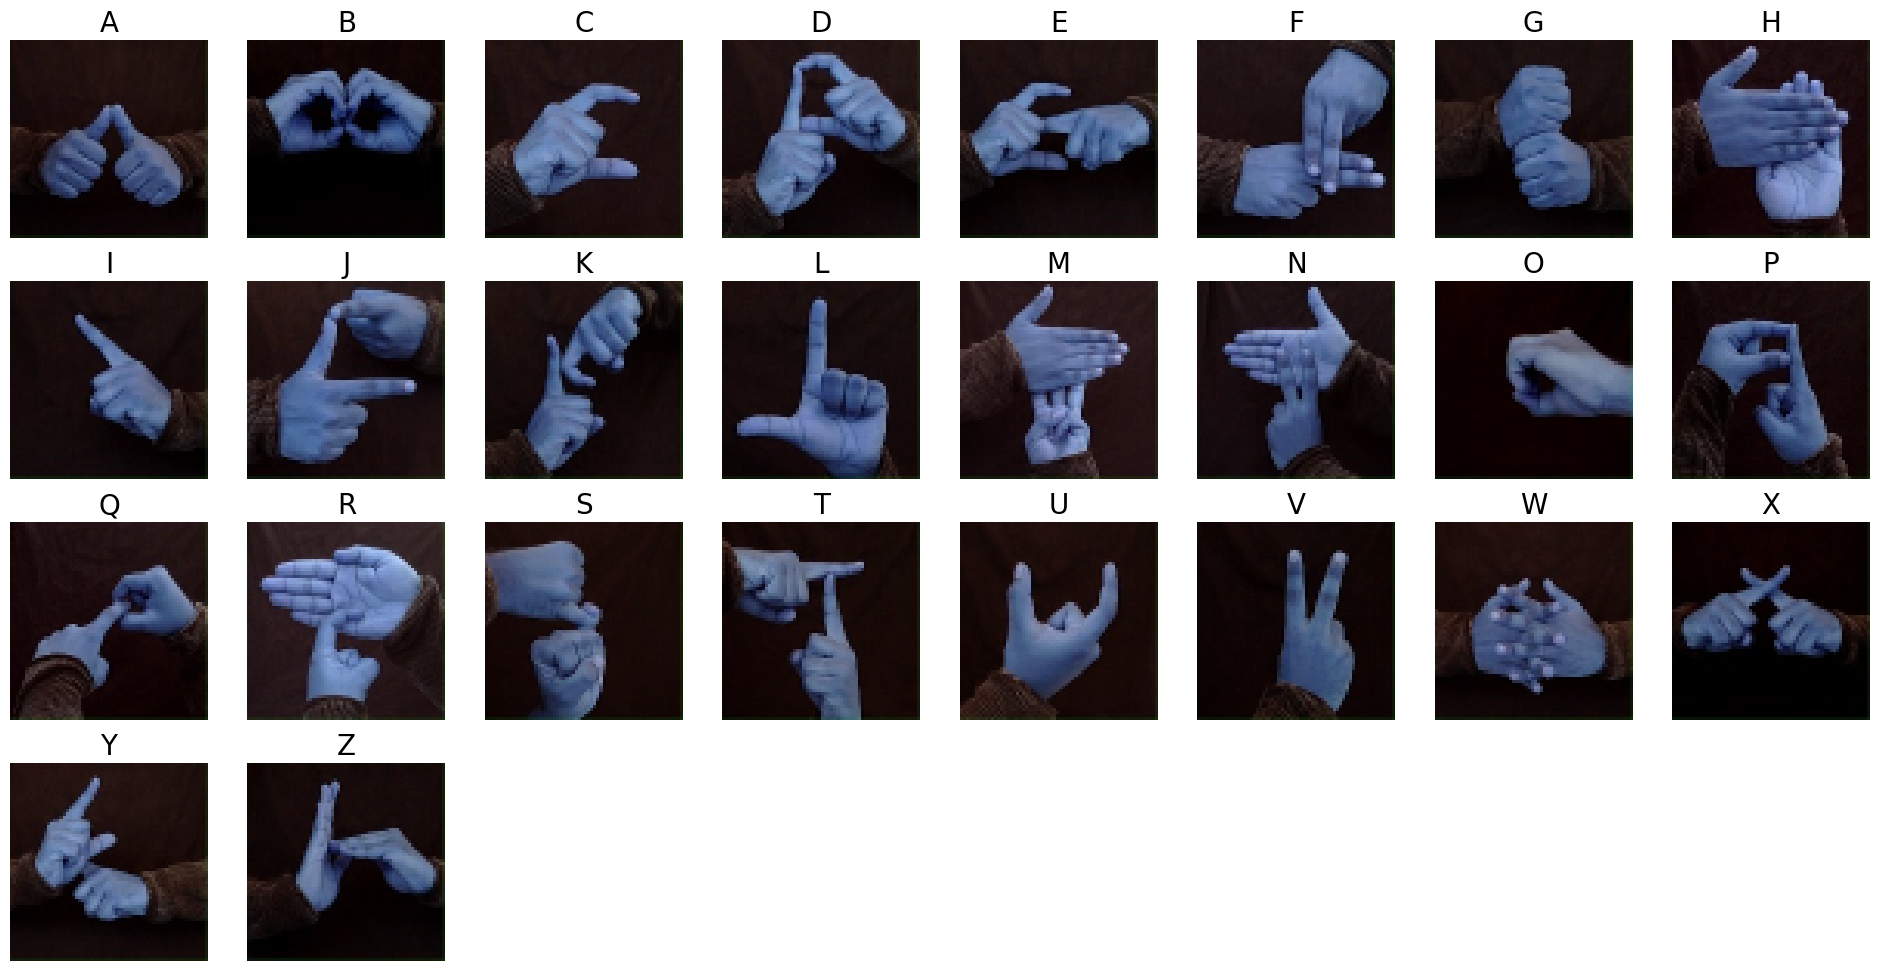

In [63]:
y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Testing images: ")
print_images(image_list = X_test)

Evaluation images: 


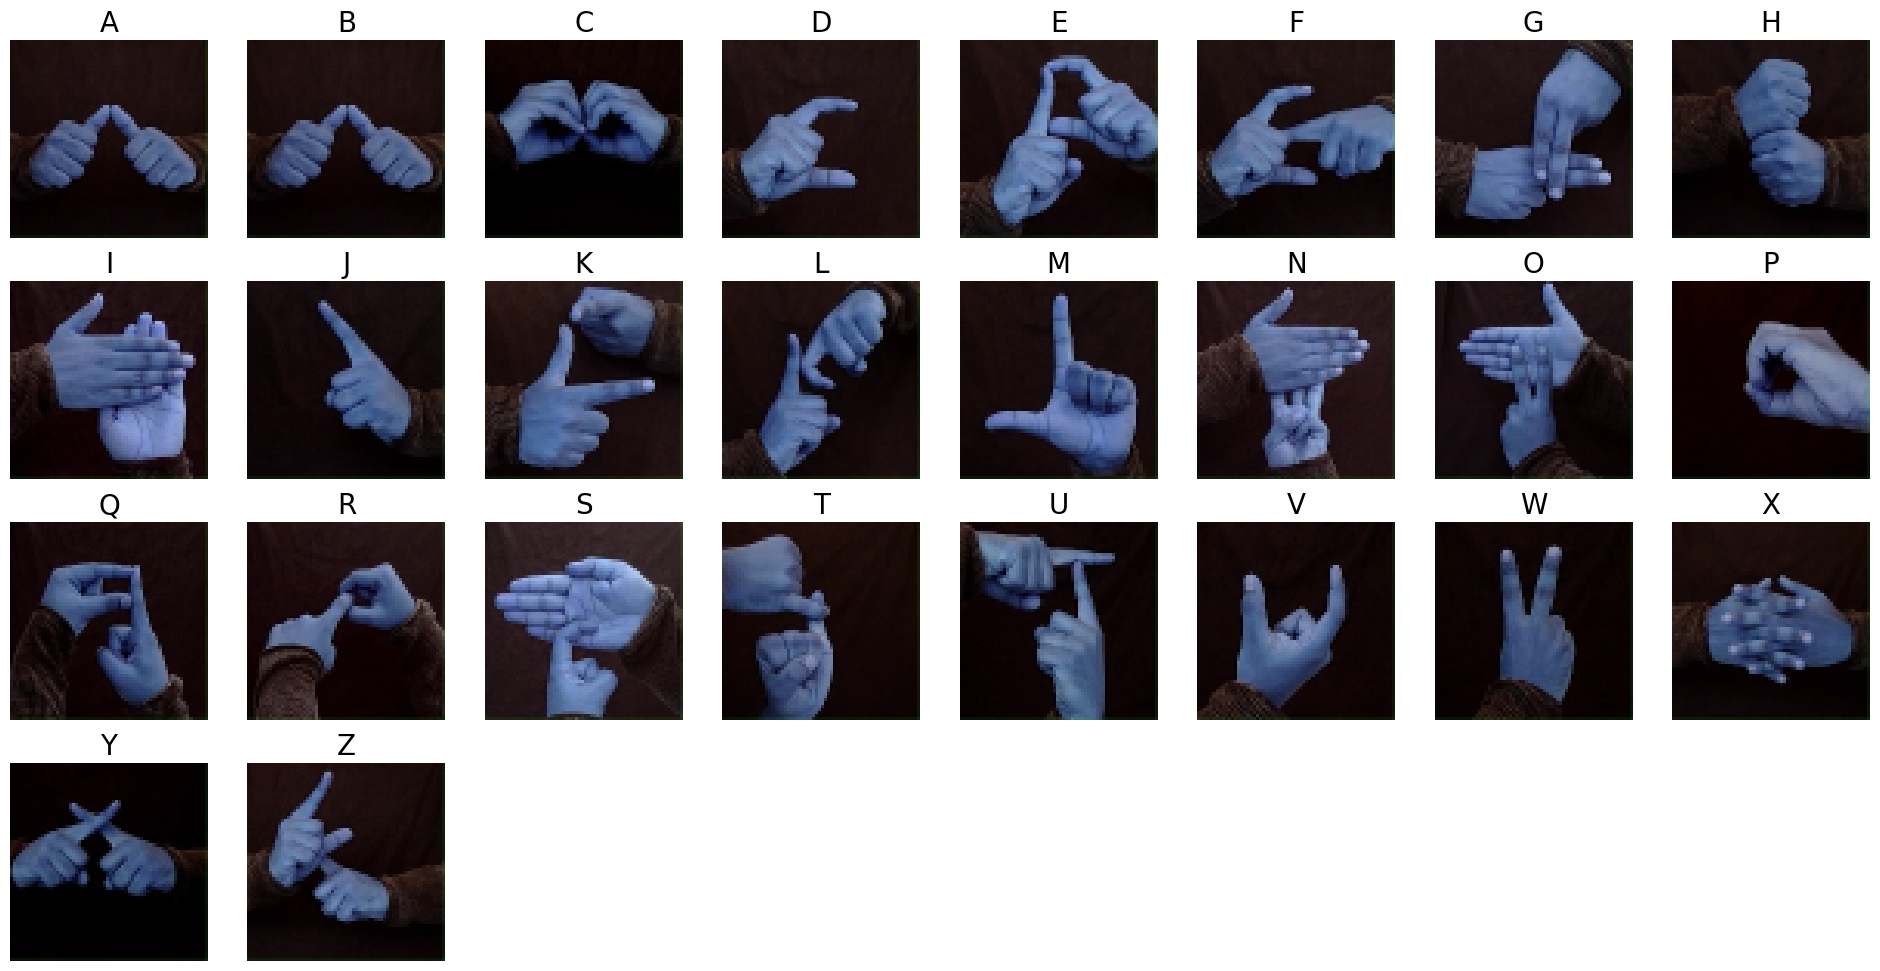

In [64]:
print("Evaluation images: ")
print_images(image_list = X_eval)



# 4. Preprocessing: One-hot enconding the data


In [65]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

In [66]:
print(y_train[0])
print(len(y_train[0]))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
26



# 5. Preprocessing - Normalize RGB values

In [67]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0


# 6. Define and run the model


In [68]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential

# input_shape=(64,64,3)
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu', 
                 input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))

# lastyear
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
# # model.add(Dense(29, activation='softmax'))
model.add(Dense(26, activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 64)        4864      
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 64)        102464    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 128)       204928    
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       409728    
                                                      

In [69]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [70]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='loss', patience=2, cooldown=0),
              EarlyStopping(monitor='acc', min_delta=1e-4, patience=2)]

In [74]:
hist = model.fit(X_train, y_train, epochs = 1, batch_size = 64,callbacks=callbacks)


ValueError: in user code:

    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 26) and (None, 4, 4, 26) are incompatible


# 7. Test the model


In [53]:
# After training your model and getting the 'hist' object, print its contents
print(hist.history)


{'loss': [0.12024044245481491], 'accuracy': [0.9654202461242676], 'lr': [0.001]}


In [47]:
model.save('new2.h5')

C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
# print('Accuracy for test images:', round(score[1]*100, 3), '%')
print('Accuracy for test images:', score[1], '%')

score = model.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

Accuracy for test images: 1.0 %
Accuracy for evaluation images: 100.0 %


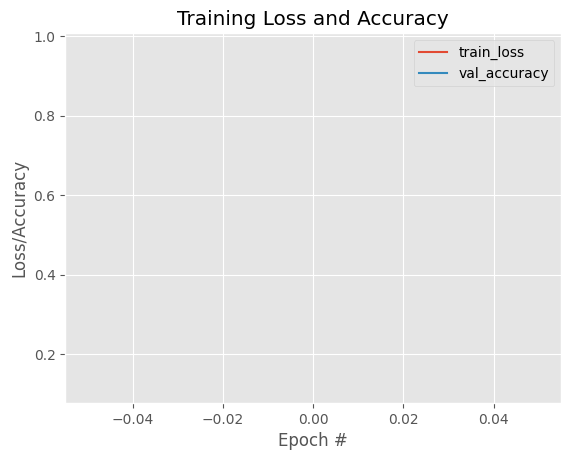

In [51]:
# # plot training/validation loss/accuracy
# plt.style.use("ggplot")
# plt.figure()
# # N = 10
# N = len(hist.history["loss"])  
# plt.plot(np.arange(0,N), hist.history["loss"], label="train_loss")
# plt.plot(np.arange(0,N), hist.history["acc"], label="val_acc")

# plt.title("Training Loss and Accuracy")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")
# plt.legend(loc="upper right")
plt.style.use("ggplot")
plt.figure()
N = len(hist.history["loss"])  # Use the length of your loss or accuracy history
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["accuracy"], label="val_accuracy")  # Change "acc" to "accuracy"

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.show()



# 8. Confusion Matrices

In [45]:
#Helper function to plot confusion matrix
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

## 8.1 Confusion Matrix for Test Set

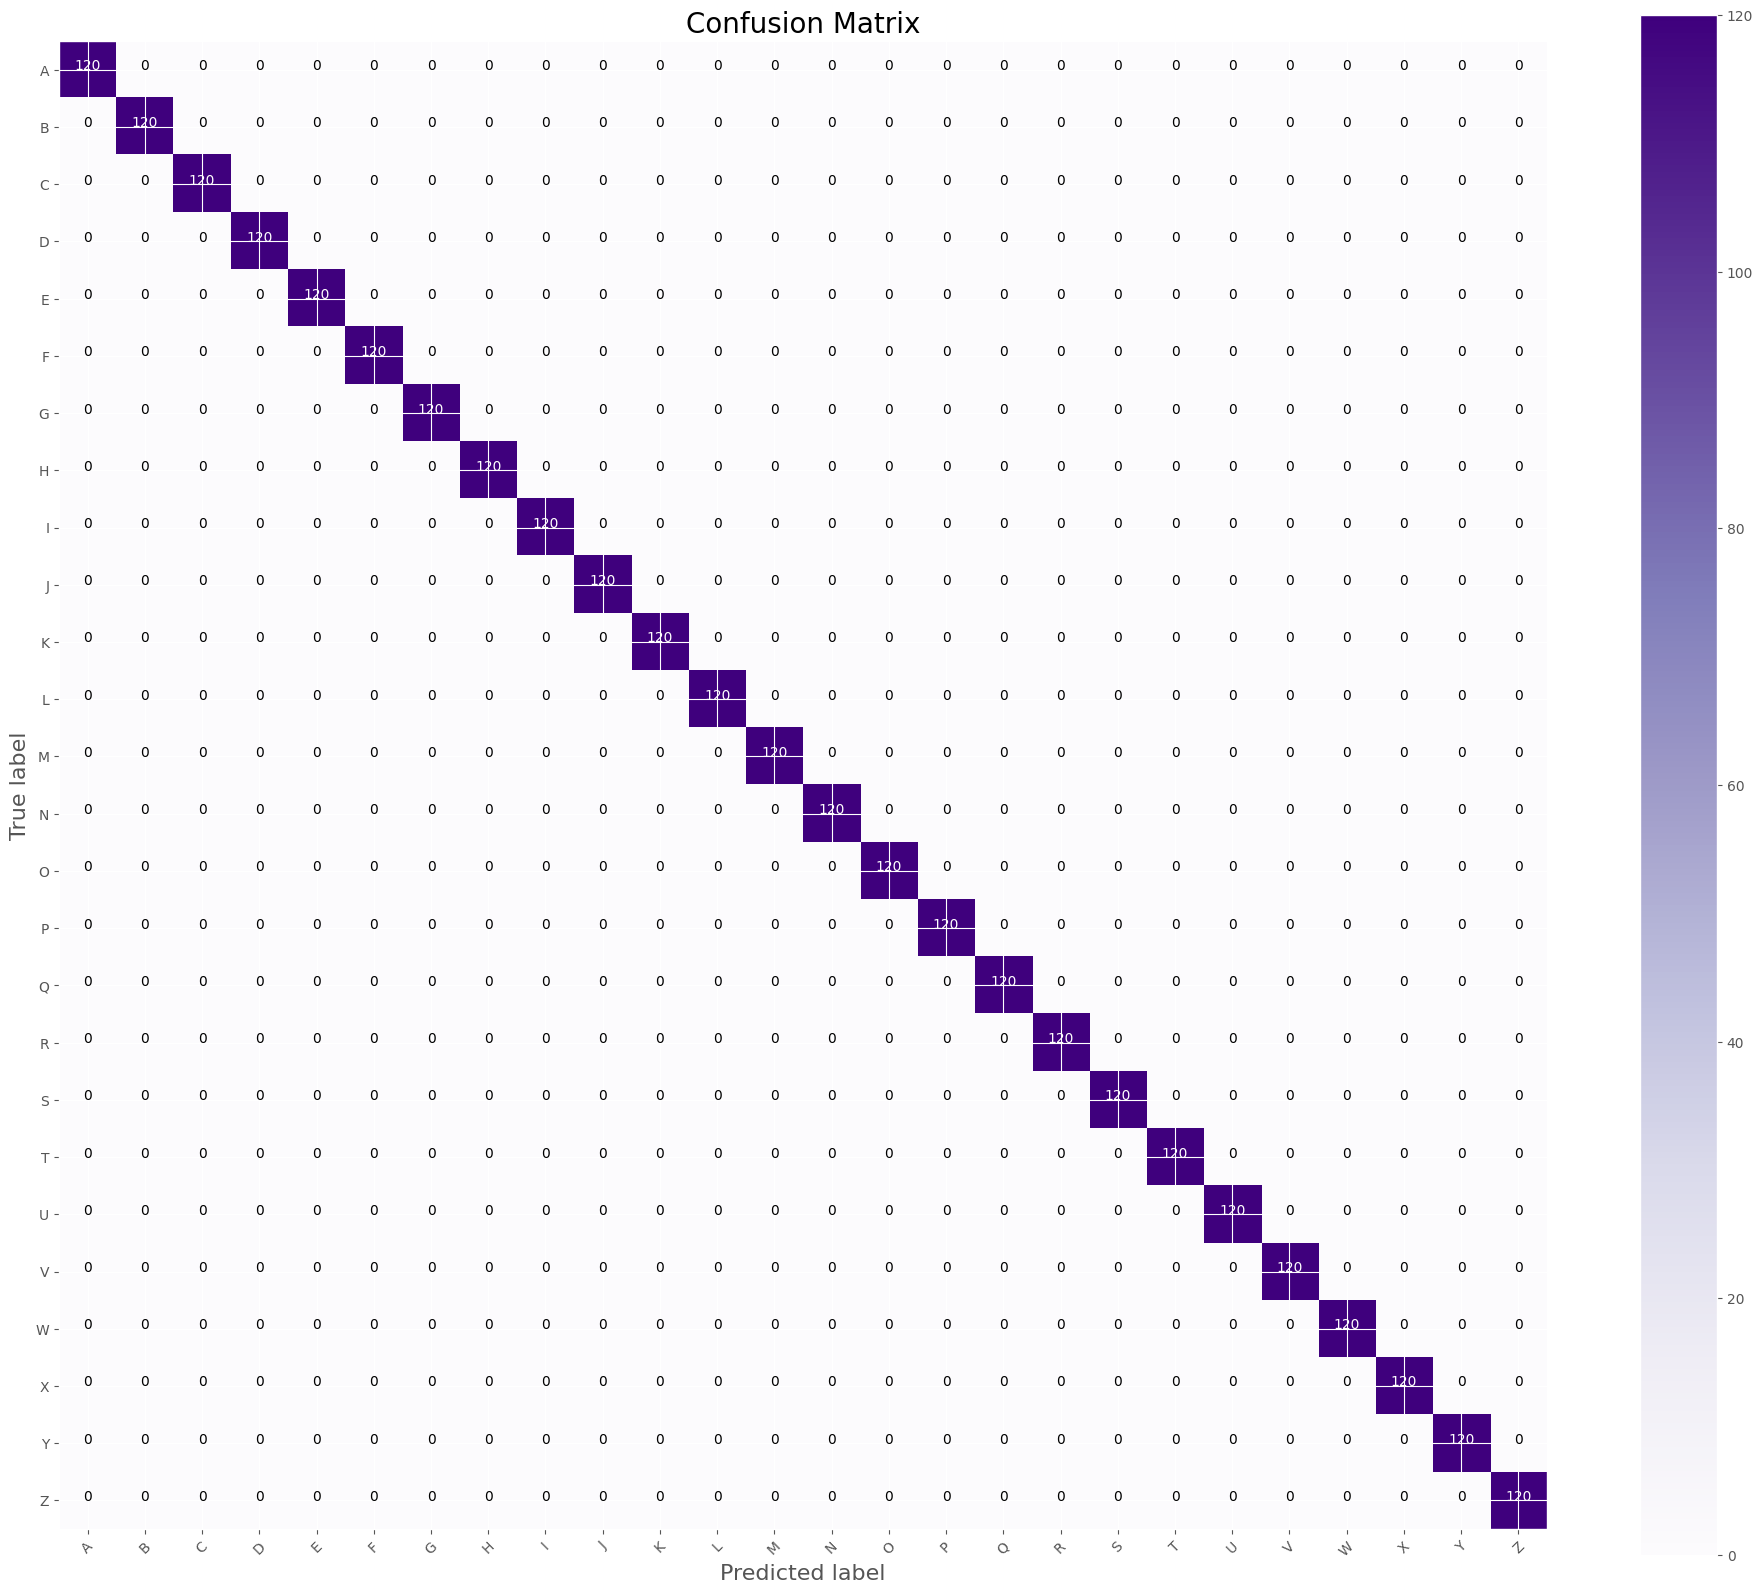

In [46]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = model.predict(X_test, batch_size = 128, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

## 8.2 Confusion Matrix for Evaluation Set

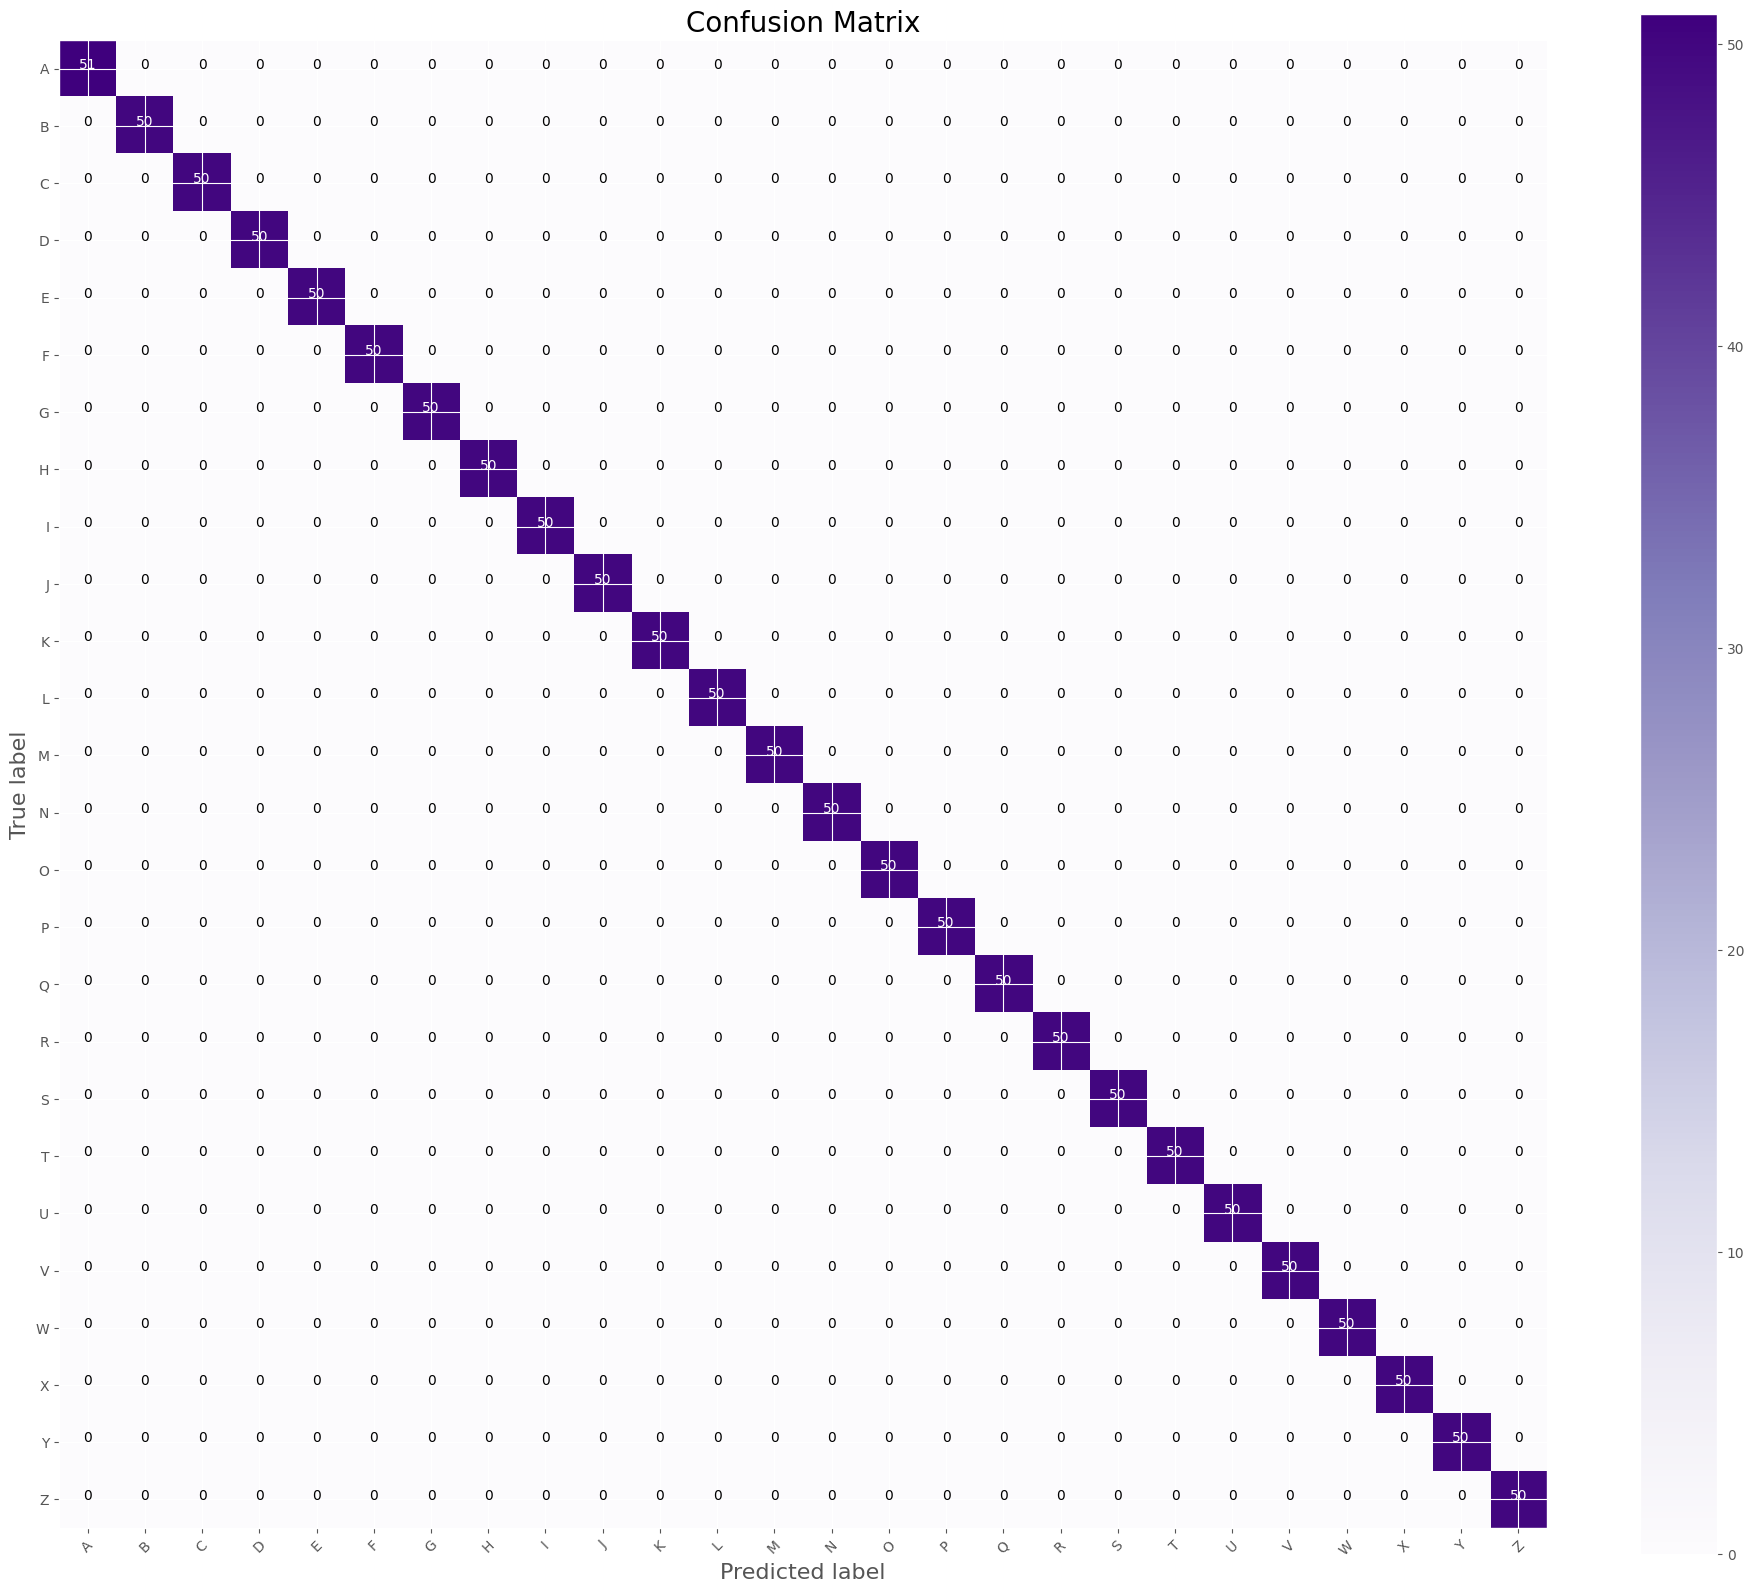

In [22]:
y_eval_pred = model.predict(X_eval, batch_size = 128, verbose = 0)
plot_confusion_matrix(y_eval, y_eval_pred)

# 9. Prediction

In [31]:
class_names=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X",
             "Y","Z"]
from keras.preprocessing import image
# predicting images
# img = image.load_img('../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/space/space2000.jpg', target_size=(64, 64))
img = image.load_img('E:\\ygesh_isl\\ASL-Recognition-CNN-OpenCV\\asl-alphabet-test\\D\\D0001_test.jpg', target_size=(128, 128))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)


In [32]:
x.shape

(1, 128, 128, 3)

In [52]:

classes = model.predict(x, batch_size=128)
print(classes)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_3/dense_2/BiasAdd' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Program Files\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Program Files\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Program Files\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ZAID B\AppData\Local\Temp\ipykernel_7464\3010936108.py", line 1, in <module>
      classes = model.predict(x, batch_size=128)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2554, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2341, in predict_function
      return step_function(self, iterator)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2327, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2315, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 2283, in predict_step
      return self(x, training=False)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ZAID B\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py", line 252, in call
      outputs = tf.nn.bias_add(outputs, self.bias)
Node: 'sequential_3/dense_2/BiasAdd'
Matrix size-incompatible: In[0]: [1,12544], In[1]: [2304,26]
	 [[{{node sequential_3/dense_2/BiasAdd}}]] [Op:__inference_predict_function_20318]

In [ ]:
class_names[np.argmax(classes)]